In [101]:
import pandas as pd
df=pd.read_csv('retail_price.csv')
print(df.shape)

(676, 30)


In [102]:
df.describe(include='all')

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676,676,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,52,9,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,health5,garden_tools,01-03-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,160,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,NaN,NaN,NaN,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,NaN,NaN,NaN,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,NaN,NaN,NaN,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,NaN,NaN,NaN,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,NaN,NaN,NaN,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000


## Data Cleaning

In [103]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [104]:
df_conti_vars = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_cat_vars = df.loc[:, (df.dtypes == 'object')]

In [105]:
df_cat_vars

,product_id,product_category_name,month_year
0,bed1,bed_bath_table,01-05-2017
1,bed1,bed_bath_table,01-06-2017
2,bed1,bed_bath_table,01-07-2017
3,bed1,bed_bath_table,01-08-2017
4,bed1,bed_bath_table,01-09-2017
...,...,...,...
671,bed5,bed_bath_table,01-05-2017
672,bed5,bed_bath_table,01-06-2017
673,bed5,bed_bath_table,01-07-2017
674,bed5,bed_bath_table,01-08-2017


## Outlier Treatment

In [106]:
df_conti_vars = df_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))


## Missing Value Treatment

In [107]:
df_conti_vars = df_conti_vars.apply(missing_imputation)
df_cat_vars = df_cat_vars.apply(missing_imputation)

In [108]:
df_cat_vars = df[['product_id', 'product_category_name']]

for c_feature in ['product_id', 'product_category_name']:
    df_cat_vars[c_feature] = df_cat_vars[c_feature].astype('category')
    df_cat_vars = create_dummies(df_cat_vars, c_feature)

C:\Users\HTC\AppData\Local\Temp\ipykernel_8244\695562975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_vars[c_feature] = df_cat_vars[c_feature].astype('category')


In [109]:
df_new = pd.concat([df_conti_vars, df_cat_vars], axis = 1)
df_new

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,product_id_watches7,product_id_watches8,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts
0,1.0,45.9500,15.100000,45.950000,39,161,2.0,350.0,4.0,57.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,137.8500,12.933333,45.950000,39,161,2.0,350.0,4.0,61.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,275.7000,14.840000,45.950000,39,161,2.0,350.0,4.0,123.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,183.8000,14.287500,45.950000,39,161,2.0,350.0,4.0,90.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,91.9000,15.100000,45.950000,39,161,2.0,350.0,4.0,54.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1.0,215.0000,8.760000,215.000000,56,162,5.0,9000.0,4.4,57.0,...,0,0,0,0,0,0,0,0,0,0
672,10.0,2090.0000,21.322000,209.000000,56,162,5.0,9000.0,4.4,61.0,...,0,0,0,0,0,0,0,0,0,0
673,59.0,8643.8725,22.195932,205.000000,56,162,5.0,9000.0,4.4,123.0,...,0,0,0,0,0,0,0,0,0,0
674,52.0,8643.8725,19.412885,199.509804,56,162,5.0,9000.0,4.4,90.0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\HTC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


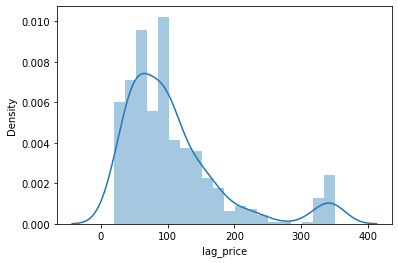

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_new.lag_price)
plt.show()

C:\Users\HTC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


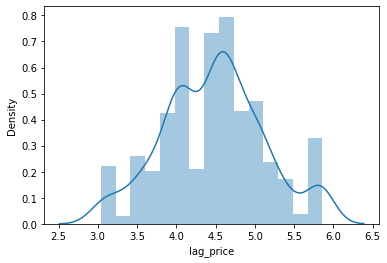

In [111]:
# apply log transformation: log is rescalling the data and making the distribution normal
import numpy as np
df_new['lag_price'] = np.log(df_new['lag_price']+1)

# Distribution of variables
sns.distplot(df_new.lag_price)
plt.show()

## Scaling of dataset

In [112]:
from sklearn.preprocessing import StandardScaler
TargetVariable=['lag_price']
 
X=df_new.drop(columns=['lag_price'])
y=df_new[TargetVariable].values
 
### Sandardization of data ###
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


## Testing and training

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(507, 85)
(507, 1)
(169, 85)
(169, 1)


In [114]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer 
model.add(Dense(units=4, input_dim=85, kernel_initializer='normal', activation='relu'))
 
# Defining the Second(Hidden) layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=3, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 45, verbose=1)

Epoch 1/45
26/26 [==============================] - 1s 2ms/step - loss: 0.9624
Epoch 2/45
26/26 [==============================] - 0s 3ms/step - loss: 0.9059
Epoch 3/45
26/26 [==============================] - 0s 3ms/step - loss: 0.7973
Epoch 4/45
26/26 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 5/45
26/26 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 6/45
26/26 [==============================] - 0s 2ms/step - loss: 0.3848
Epoch 7/45
26/26 [==============================] - 0s 3ms/step - loss: 0.2829
Epoch 8/45
26/26 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 9/45
26/26 [==============================] - 0s 2ms/step - loss: 0.1491
Epoch 10/45
26/26 [==============================] - 0s 2ms/step - loss: 0.1122
Epoch 11/45
26/26 [==============================] - 0s 2ms/step - loss: 0.0886
Epoch 12/45
26/26 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 13/45
26/26 [==============================

In [115]:
predictors=pd.DataFrame(data=df_new,columns=df_new.drop(columns='lag_price').columns)

In [116]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=predictors.columns)
TestingData['Value']=y_test_orig
TestingData['PredictedValue']=Predictions
TestingData.head(10)

6/6 [==============================] - 0s 3ms/step


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts,Value,PredictedValue
0,18.0,3139.80,20.992778,174.433333,35.0,514.0,2.0,4338.0,3.8,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.453139,5.134000
1,14.0,1819.86,17.396429,129.990000,33.0,897.0,1.0,1600.0,4.3,33.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.875121,4.895908
2,1.0,99.90,21.190000,99.900000,57.0,272.0,1.0,2500.0,4.4,64.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.613634,4.385033
3,28.0,2179.00,13.090357,77.821429,59.0,319.0,4.0,250.0,3.9,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.369448,4.385033
4,3.0,299.97,16.540000,99.990000,54.0,1012.0,1.0,1200.0,4.2,102.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.615022,4.573903
5,9.0,477.10,16.460000,52.900000,57.0,339.0,2.0,1800.0,4.2,102.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.005513,4.385033
6,32.0,4860.11,20.313750,151.878437,35.0,514.0,2.0,4338.0,3.8,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.209486,4.991946
7,82.0,4397.70,17.807805,53.379104,58.0,340.0,2.0,1500.0,4.0,339.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.109233,4.007912
8,12.0,550.80,13.687500,45.900000,38.0,735.0,5.0,800.0,4.2,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.810089,3.870375
9,7.0,735.00,23.385714,105.000000,58.0,3006.0,2.0,1000.0,4.2,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.663439,4.660539


In [117]:
#print(TestingData.head(10))
print(TestingData.iloc[0:10,0:12])
print(TestingData.iloc[0:10,85:87])


    qty  total_price  freight_price  unit_price  product_name_lenght  \
0  18.0      3139.80      20.992778  174.433333                 35.0   
1  14.0      1819.86      17.396429  129.990000                 33.0   
2   1.0        99.90      21.190000   99.900000                 57.0   
3  28.0      2179.00      13.090357   77.821429                 59.0   
4   3.0       299.97      16.540000   99.990000                 54.0   
5   9.0       477.10      16.460000   52.900000                 57.0   
6  32.0      4860.11      20.313750  151.878437                 35.0   
7  82.0      4397.70      17.807805   53.379104                 58.0   
8  12.0       550.80      13.687500   45.900000                 38.0   
9   7.0       735.00      23.385714  105.000000                 58.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       514.0                 2.0            4338.0   
1                       897.0                 1.0            1600

In [118]:
TestingData.columns

Index(['qty', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'product_id_bed2', 'product_id_bed3', 'product_id_bed4',
       'product_id_bed5', 'product_id_computers1', 'product_id_computers2',
       'product_id_computers3', 'product_id_computers4',
       'product_id_computers5', 'product_id_computers6',
       'product_id_consoles1', 'product_id_consoles2', 'product_id_cool1',
       'product_id_cool2', 'product_id_cool3', 'product_id_cool4',
       'product_id_cool5', 'product_id_furniture1', 'product_id_furniture2',
       'product_id_furniture3', 'product_id_furniture4', 'product_id_garden1',
       'product_id_garden10', 'product_id_garden2', 'product_id_garden3',
       'product_id_garde

In [119]:
result=pd.DataFrame({'Quantity':TestingData['qty'],'freight_price':TestingData['freight_price'],'unit_price':TestingData['unit_price'],'product_name_length':TestingData['product_name_lenght'],
                    'product_description_length':TestingData['product_description_lenght'],'product_photos_qty':TestingData['product_photos_qty'],'product_weight_g':TestingData['product_weight_g'],
                    'product_score':TestingData['product_score'],'customers':TestingData['customers'],'scaled_value':TestingData['Value'],
                    'predicted_scaled_value':TestingData['PredictedValue']})

result.head(10)

,Quantity,freight_price,unit_price,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_score,customers,scaled_value,predicted_scaled_value
0,18.0,20.992778,174.433333,35.0,514.0,2.0,4338.0,3.8,91.0,5.453139,5.134000
1,14.0,17.396429,129.990000,33.0,897.0,1.0,1600.0,4.3,33.0,4.875121,4.895908
2,1.0,21.190000,99.900000,57.0,272.0,1.0,2500.0,4.4,64.0,4.613634,4.385033
3,28.0,13.090357,77.821429,59.0,319.0,4.0,250.0,3.9,61.0,4.369448,4.385033
4,3.0,16.540000,99.990000,54.0,1012.0,1.0,1200.0,4.2,102.0,4.615022,4.573903
5,9.0,16.460000,52.900000,57.0,339.0,2.0,1800.0,4.2,102.0,4.005513,4.385033
6,32.0,20.313750,151.878437,35.0,514.0,2.0,4338.0,3.8,125.0,5.209486,4.991946
7,82.0,17.807805,53.379104,58.0,340.0,2.0,1500.0,4.0,339.0,4.109233,4.007912
8,12.0,13.687500,45.900000,38.0,735.0,5.0,800.0,4.2,41.0,3.810089,3.870375
9,7.0,23.385714,105.000000,58.0,3006.0,2.0,1000.0,4.2,61.0,4.663439,4.660539


In [121]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('Accuracy of the model is',r2_score(y_test_orig,Predictions))
print('MSE',mean_squared_error(y_test_orig,Predictions))
print('MAE',mean_absolute_error(y_test_orig,Predictions))

Accuracy of the model is 0.966087970216016
MSE 0.014699903583276983
MAE 0.07956341365584453


## final result

In [123]:
fresult=pd.DataFrame({'Actual':result['scaled_value'],'Predicted':result['predicted_scaled_value']})
fresult['Actual']=np.exp(fresult['Actual'])
fresult['Predicted']=np.exp(fresult['Predicted'])
fresult=fresult.astype({'Actual':int,'Predicted':int})

fresult

,Actual,Predicted
0,233,169
1,130,133
2,100,80
3,79,80
4,100,96
...,...,...
164,67,85
165,89,91
166,179,174
167,50,53


<AxesSubplot:xlabel='Value', ylabel='PredictedValue'>

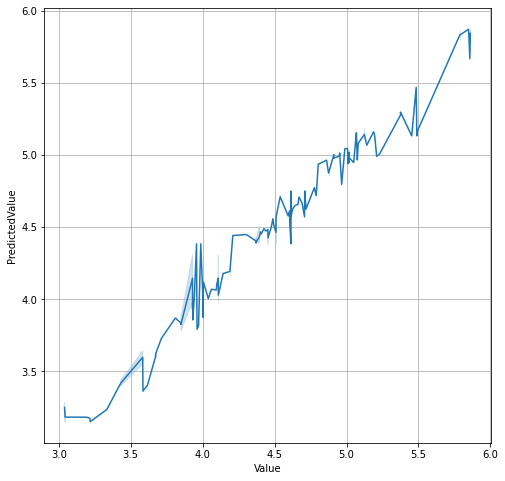

In [129]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.rcParams['axes.grid'] = True
sns.lineplot(x=TestingData['Value'],y=TestingData['PredictedValue'])